### Importación de Librerias y Lectura de Datos

In [28]:
"""
Importar Librerias
"""

import pandas as pd # Lectura y Transformación de Datos
import matplotlib.pyplot as plt # Visualización de Datos
import seaborn as sns
import numpy as np # Manejo de arreglos y operaciones de vectores

from sklearn.model_selection import cross_val_score, train_test_split, KFold, learning_curve, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


In [2]:
"""
Lectura de la base de datos
"""

# Establecemos la ruta de la base
ruta = r'C:\Users\Manuel Montufar\Documents\ProyectosManu\Escuela\Concentración\Clase Uresti\Implementación\Vehiculos.csv'
# Definimos el data frame y leemos la base
df = pd.read_csv(f'{ruta}')
#Imprimimos el data frame y el tamaño de la base
print(df)

        year    make                model       body transmission  odometer  \
0       2015     Kia              Sorento        SUV    automatic     16639   
1       2015     Kia              Sorento        SUV    automatic      9393   
2       2014     BMW             3 Series      Sedan    automatic      1331   
3       2015   Volvo                  S60      Sedan    automatic     14282   
4       2014     BMW  6 Series Gran Coupe      Sedan    automatic      2641   
...      ...     ...                  ...        ...          ...       ...   
558832  2015     Kia                 K900      Sedan    automatic     18255   
558833  2012     Ram                 2500   Crew Cab    automatic     54393   
558834  2012     BMW                   X5        SUV    automatic     50561   
558835  2015  Nissan               Altima      sedan    automatic     16658   
558836  2014    Ford                F-150  SuperCrew    automatic     15008   

         color interior    mmr  sellingprice  
0   

### Transformación de Datos

In [3]:
""" 
Transformación 
de Datos
"""

# Conteo de valores nulos por columna
nulos = df.isnull().sum()
# Imprime el resultado
print(f"El conteo de valores nulos es: {nulos}")

# Encuentra la moda de la columna 'interior'
moda_interior = df['interior'].mode()[0]
print(f"La moda de la columna interior es: {moda_interior}")

# Rellena los valores nulos en la columna 'interior' con la moda
df.update(df[['interior']].fillna(moda_interior))

# Verifica que ya no haya valores nulos
nulos_post = df.isnull().sum()
print(f"Los valores nulos después de aplicar la moda son: {nulos_post}")

# Obtiene los valores únicos por columna
valores_unicos = {col: df[col].unique().tolist() for col in df.columns}

# Imprime los valores únicos
for col, valores in valores_unicos.items():
    print(f"Columna '{col}' tiene {len(valores)} valores únicos: {valores[:10]} {'...' if len(valores) > 10 else ''}")

# Vemos estadísticas descriptivas
print(df.describe())

El conteo de valores nulos es: year                0
make                0
model               0
body                0
transmission        0
odometer            0
color               0
interior        17077
mmr                 0
sellingprice        0
dtype: int64
La moda de la columna interior es: black
Los valores nulos después de aplicar la moda son: year            0
make            0
model           0
body            0
transmission    0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64
Columna 'year' tiene 34 valores únicos: [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006] ...
Columna 'make' tiene 61 valores únicos: ['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford', 'Hyundai', 'Buick', 'Cadillac'] ...
Columna 'model' tiene 973 valores únicos: ['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima', 'M5', 'Cruze', 'A4', 'Camaro', 'A6'] ...
Columna 'body' tiene 87 valores únicos: ['SUV', 'Sedan', 'Con

### Entrenamiento del Modelo

In [4]:
""" 
Definir el target
"""
# Variables predictoras (X) y objetivo (y)
X = df[['year','mmr']]
y = df[['sellingprice']]

# Transformarlo a un array unidimensional
y = y.values.ravel()

In [5]:
""" 
Validación Cruzada
"""

# Definir el modelo
gbr = GradientBoostingRegressor(random_state=42)

# Definir las métricas para la validación cruzada
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score),
    'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
    'Explained Variance': make_scorer(explained_variance_score)
}

# Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
for metric_name, metric in scoring.items():
    scores = cross_val_score(gbr, X, y, cv=cv, scoring=metric)
    results[metric_name] = scores.mean(), scores.std()

# Mostrar resultados de validación cruzada
results_df = pd.DataFrame(results, index=['Mean', 'Std'])
print(results_df)

               MSE          MAE        R2         RMSE  Explained Variance
Mean -3.090444e+06 -1095.342744  0.967498 -1757.366919            0.967498
Std   1.634958e+05     3.681566  0.001436    45.887042            0.001436


In [6]:
""" 
Entrenamiento del
Modelo
""" 
# Dividir en entrenamiento y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [7]:
# Asegúrate de que y_train y y_test sean vectores unidimensionales
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

In [8]:
# Entrenamiento del modelo
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Evaluación en el conjunto de validación
y_val_pred = gbr.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_ev = explained_variance_score(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

print("Métricas en el conjunto de validación:")
print(f"MSE: {val_mse}")
print(f"MAE: {val_mae}")
print(f"RMSE: {val_rmse}")
print(f"R2: {val_r2}")
print(f"Explained Variance: {val_ev}")

Métricas en el conjunto de validación:
MSE: 2958548.607168801
MAE: 1096.5781366455794
RMSE: 1720.0431992158806
R2: 0.9690619723577056
Explained Variance: 0.969062580621985


In [9]:
# Evaluación en el conjunto de prueba
y_test_pred = gbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_ev = explained_variance_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Métricas en el conjunto de prueba:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R2: {test_r2}")
print(f"Explained Variance: {test_ev}")

Métricas en el conjunto de prueba:
MSE: 2939776.089715036
MAE: 1089.055318619329
RMSE: 1714.57752513995
R2: 0.9686257717227669
Explained Variance: 0.9686257854802504


In [10]:
# Diagnóstico de Bias, Varianza y Ajuste del Modelo
if val_rmse > test_rmse:
    print("Modelo: Posible sobreajuste (overfitting)")
elif val_rmse < test_rmse:
    print("Modelo: Posible ajuste insuficiente (underfitting)")
else:
    print("Modelo: Bien ajustado")

Modelo: Posible sobreajuste (overfitting)


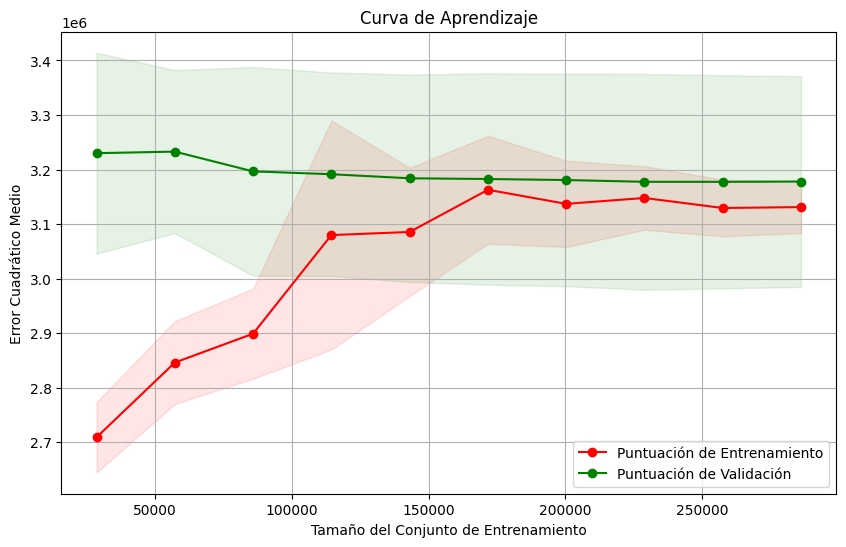

In [11]:
# Curva de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Convertir los puntajes negativos de MSE a positivos
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Puntuación de Validación')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Aprendizaje')
plt.legend(loc='best')
plt.grid(True)
plt.show()


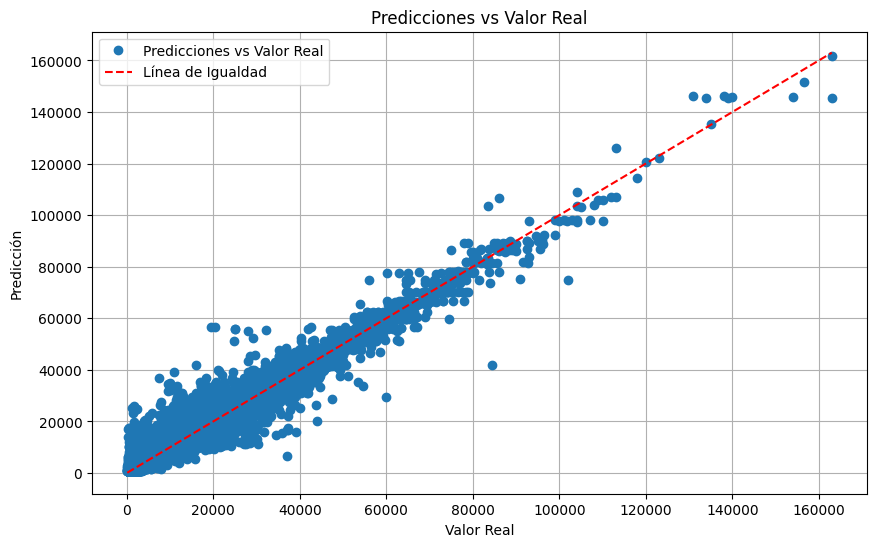

In [12]:
# Gráfico de Predicción
min_val = min(np.min(y_test), np.min(y_test_pred))
max_val = max(np.max(y_test), np.max(y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(y_test, y_test_pred, 'o', label='Predicciones vs Valor Real')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Línea de Igualdad')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valor Real')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Solicitar entradas del usuario
try:
    year_input = int(input("Introduce el año del vehículo (e.g., 2015): "))
    mmr_input = float(input("Introduce el valor del MMR (Market Value, e.g., 15000.00): "))

    if year_input > 0 and mmr_input >= 0:
        X_new = np.array([[year_input, mmr_input]])
        predicted_price = gbr.predict(X_new)
        print(f"El precio de venta estimado para el vehículo es: ${predicted_price[0]:,.2f}")
    else:
        print("Por favor, introduce valores válidos.")
except ValueError:
    print("Entrada no válida. Asegúrate de introducir números para el año y el MMR.")

### Grid Search

In [13]:
# Nuevos hiperparámetros para mejorar el ajuste
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo después del ajuste
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)


Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}


In [14]:
best_gbr = grid_search.best_estimator_

In [15]:
# Métricas en el conjunto de entrenamiento para el mejor modelo
y_train_pred_best = best_gbr.predict(X_train)
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)
train_ev_best = explained_variance_score(y_train, y_train_pred_best)
train_rmse_best = np.sqrt(train_mse_best)

print("Métricas en el conjunto de entrenamiento con el mejor modelo:")
print(f"MSE: {train_mse_best}")
print(f"MAE: {train_mae_best}")
print(f"RMSE: {train_rmse_best}")
print(f"R2: {train_r2_best}")
print(f"Explained Variance: {train_ev_best}")

Métricas en el conjunto de entrenamiento con el mejor modelo:
MSE: 3120901.5695172898
MAE: 1091.9774710059974
RMSE: 1766.607361446592
R2: 0.9672614654253165
Explained Variance: 0.9672614654253165


In [16]:
# Evaluación con el mejor modelo encontrado
y_test_pred_best = best_gbr.predict(X_test)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
test_ev_best = explained_variance_score(y_test, y_test_pred_best)
test_rmse_best = np.sqrt(test_mse_best)

print("Métricas en el conjunto de prueba con el mejor modelo:")
print(f"MSE: {test_mse_best}")
print(f"MAE: {test_mae_best}")
print(f"RMSE: {test_rmse_best}")
print(f"R2: {test_r2_best}")
print(f"Explained Variance: {test_ev_best}")

Métricas en el conjunto de prueba con el mejor modelo:
MSE: 2936733.273149852
MAE: 1086.379333852497
RMSE: 1713.6899582917129
R2: 0.9686582456318703
Explained Variance: 0.9686582461874972


In [17]:
# Diagnóstico de overfitting
if train_rmse_best < test_rmse_best and (test_rmse_best - train_rmse_best) > 0.1 * test_rmse_best:
    print("\nDiagnóstico: El modelo presenta sobreajuste (overfitting)")
elif train_rmse_best > test_rmse_best:
    print("\nDiagnóstico: El modelo presenta ajuste insuficiente (underfitting)")
else:
    print("\nDiagnóstico: El modelo está bien ajustado (fitting adecuado)")


Diagnóstico: El modelo presenta ajuste insuficiente (underfitting)


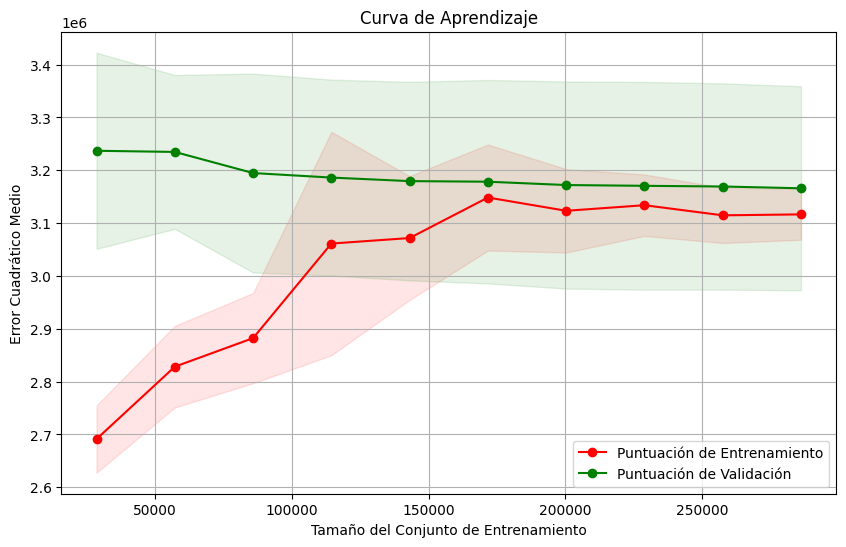

In [18]:
# Curva de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Convertir los puntajes negativos de MSE a positivos
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Puntuación de Validación')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Aprendizaje')
plt.legend(loc='best')
plt.grid(True)
plt.show()

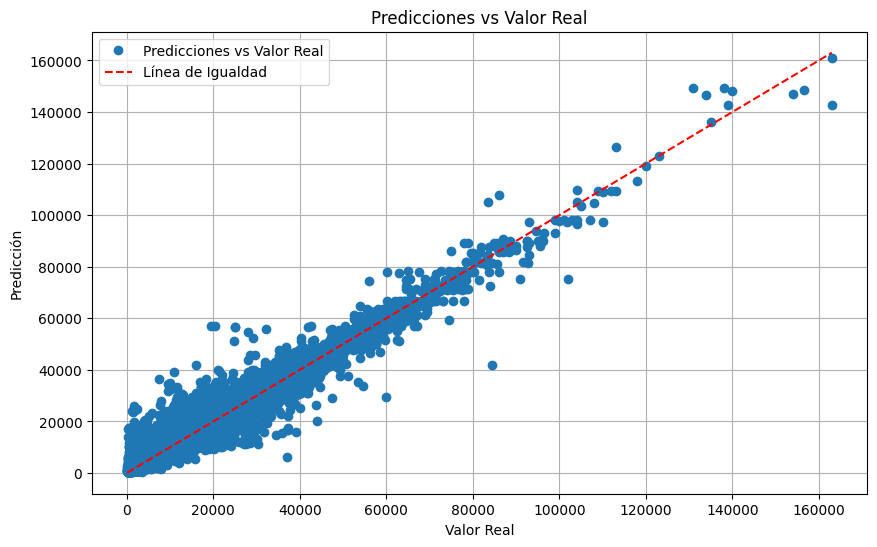

In [19]:
# Gráfico de Predicción
min_val = min(np.min(y_test), np.min(y_test_pred_best))
max_val = max(np.max(y_test), np.max(y_test_pred_best))

plt.figure(figsize=(10, 6))
plt.plot(y_test, y_test_pred_best, 'o', label='Predicciones vs Valor Real')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Línea de Igualdad')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valor Real')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Solicitar entradas del usuario
try:
    year_input = int(input("Introduce el año del vehículo (e.g., 2015): "))
    mmr_input = float(input("Introduce el valor del MMR (Market Value, e.g., 15000.00): "))

    if year_input > 0 and mmr_input >= 0:
        X_new = np.array([[year_input, mmr_input]])
        predicted_price = best_gbr.predict(X_new)
        print(f"El precio de venta estimado para el vehículo es: ${predicted_price[0]:,.2f}")
    else:
        print("Por favor, introduce valores válidos.")
except ValueError:
    print("Entrada no válida. Asegúrate de introducir números para el año y el MMR.")

El precio de venta estimado para el vehículo es: $21,526.06


c:\Users\Manuel Montufar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### Nuevo Modelo con Hiperparametros 

In [21]:
# Tuneado de hiperparámetros
gbr_tuned = GradientBoostingRegressor(
    learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=200
)
# Definir las métricas para la validación cruzada
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score),
    'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
    'Explained Variance': make_scorer(explained_variance_score)
}

# Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
for metric_name, metric in scoring.items():
    scores = cross_val_score(gbr, X, y, cv=cv, scoring=metric)
    results[metric_name] = scores.mean(), scores.std()

# Mostrar resultados de validación cruzada
results_df = pd.DataFrame(results, index=['Mean', 'Std'])
print(results_df)

               MSE          MAE        R2         RMSE  Explained Variance
Mean -3.090444e+06 -1095.342744  0.967498 -1757.366919            0.967498
Std   1.634958e+05     3.681566  0.001436    45.887042            0.001436


In [22]:
# Entrenamiento del modelo
gbr_tuned = GradientBoostingRegressor(
    learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=200
)
gbr_tuned.fit(X_train, y_train)

# Evaluación en el conjunto de validación
y_val_pred = gbr_tuned.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_ev = explained_variance_score(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

print("Métricas en el conjunto de validación:")
print(f"MSE: {val_mse}")
print(f"MAE: {val_mae}")
print(f"RMSE: {val_rmse}")
print(f"R2: {val_r2}")
print(f"Explained Variance: {val_ev}")

Métricas en el conjunto de validación:
MSE: 2949455.3074698546
MAE: 1093.942487000455
RMSE: 1717.397830285649
R2: 0.9691570624828988
Explained Variance: 0.9691575475268653


In [23]:
# Evaluación en el conjunto de prueba
y_test_pred = gbr_tuned.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_ev = explained_variance_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Métricas en el conjunto de prueba:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R2: {test_r2}")
print(f"Explained Variance: {test_ev}")

Métricas en el conjunto de prueba:
MSE: 2934059.5518996282
MAE: 1086.3729935410515
RMSE: 1712.9096741800568
R2: 0.9686867804380237
Explained Variance: 0.9686867815734989


In [24]:
# Diagnóstico de Bias, Varianza y Ajuste del Modelo
if val_rmse > test_rmse:
    print("Modelo: Posible sobreajuste (overfitting)")
elif val_rmse < test_rmse:
    print("Modelo: Posible ajuste insuficiente (underfitting)")
else:
    print("Modelo: Bien ajustado")

Modelo: Posible sobreajuste (overfitting)


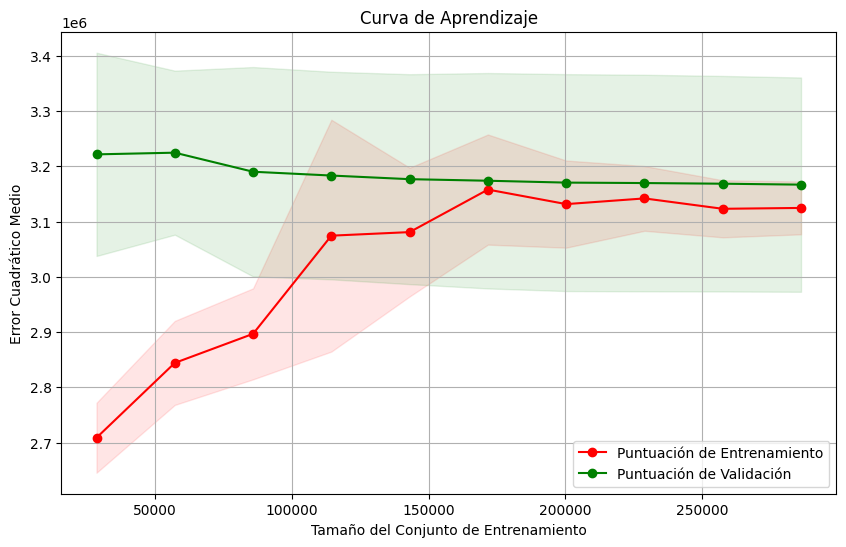

In [25]:
# Curva de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    gbr_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Convertir los puntajes negativos de MSE a positivos
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Puntuación de Validación')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Aprendizaje')
plt.legend(loc='best')
plt.grid(True)
plt.show()

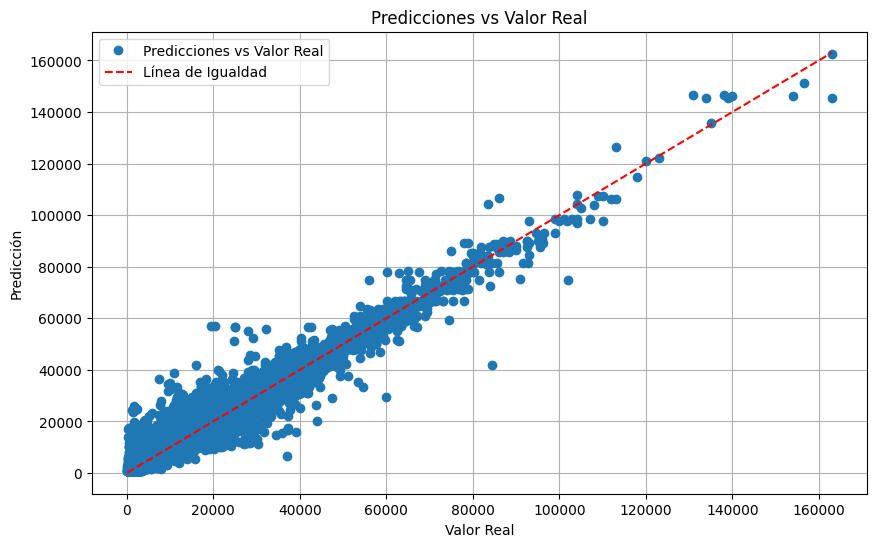

In [26]:
# Gráfico de Predicción
min_val = min(np.min(y_test), np.min(y_test_pred))
max_val = max(np.max(y_test), np.max(y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(y_test, y_test_pred, 'o', label='Predicciones vs Valor Real')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Línea de Igualdad')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valor Real')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Solicitar entradas del usuario
try:
    year_input = int(input("Introduce el año del vehículo (e.g., 2015): "))
    mmr_input = float(input("Introduce el valor del MMR (Market Value, e.g., 15000.00): "))

    if year_input > 0 and mmr_input >= 0:
        X_new = np.array([[year_input, mmr_input]])
        predicted_price = gbr_tuned.predict(X_new)
        print(f"El precio de venta estimado para el vehículo es: ${predicted_price[0]:,.2f}")
    else:
        print("Por favor, introduce valores válidos.")
except ValueError:
    print("Entrada no válida. Asegúrate de introducir números para el año y el MMR.")

El precio de venta estimado para el vehículo es: $15,771.79


c:\Users\Manuel Montufar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### Conclusión

Aunque es posible que caiga en overfitting por la complejidad de los datos, podemos observar que el mejor fue el modelo con hiperparametros inventados, ya que su curva y sus metricas fueron un poco mejor, quizas entrenar el modelo con más features que solo el precio de mercado sería ideal, el problema solo seria el feature engineering que tendría costo computacional.

Tambien sería bueno probar con un modelo menos complejo como XGboost para esta tarea, yo utilice el Gradient Boosting porque es un modelo que me gusta mucho, pero sería bueno intentar con ese.